## Task 2 of 10 Day ML Challenge

<b>Task : Titanic dataset cleaning+Feature Engineering and visualization only 

Data Dictionary link : https://www.kaggle.com/c/titanic/data


In [17]:
!pip install facets-overview

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
train_df = pd.read_csv("data/train.csv")

In [20]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h2> Data Analysis </h2>

<b>Check for NULL Values :

In [21]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
train_df.shape

(891, 12)

<b> Check for Data Types:

In [23]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

<b>Analysis before modelling:

<p>Column <b>Name</b> is not needed as there is PassengerId </p>
<p>Column <b>Age</b> can be removed as it has null values and it cant be imputed by mean, mode as it would be wrong</p>
<p>Column <b>Cabin</b> to be removed as out of 891 rows 687 values are null i.e. more than 50% are null</p>

 <h2> EDA </b>

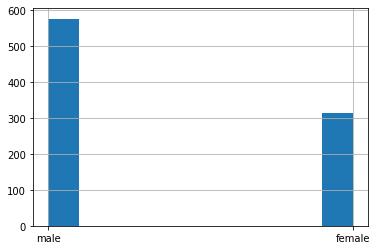

In [24]:
train_df.Sex.hist()

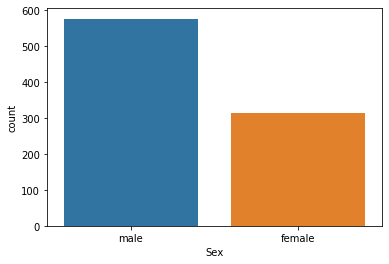

In [35]:
sns.countplot(x='Sex',data=train_df)

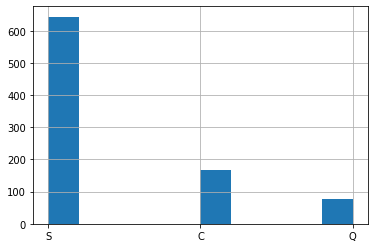

In [29]:
train_df.Embarked.hist()

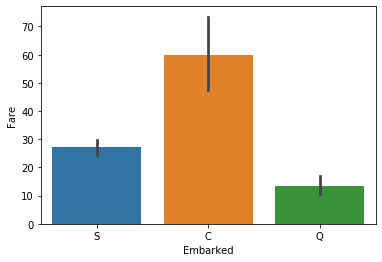

In [33]:
sns.barplot(x='Embarked',y='Fare',data=train_df)

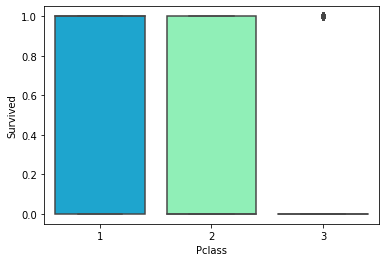

In [37]:
sns.boxplot(x='Pclass',y='Survived',data=train_df,palette='rainbow')

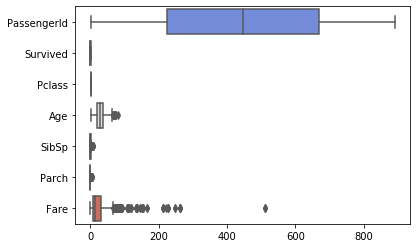

In [38]:
#Can do entire dataframe with orient='h'
sns.boxplot(data=train_df,palette='coolwarm',orient='h')

<h1> Data Cleaning

In [41]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [52]:
def Data_Cleaning(df):
    #removal of Name
    df= df.drop(['Name'],axis=1)
    
    #removal of Age
    df= df.drop(['Age'],axis=1)
    #removal of Cabin
    df= df.drop(['Cabin'],axis=1)
    #removal of TicketNumber
    df= df.drop(['Ticket'],axis=1)
    df= pd.get_dummies(df)
    return df

In [53]:
train_df = Data_Cleaning(train_df)

In [54]:
train_df.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,0,7.2500,0,1,0,0,1
1,2,1,1,1,0,71.2833,1,0,1,0,0
2,3,1,3,0,0,7.9250,1,0,0,0,1
3,4,1,1,1,0,53.1000,1,0,0,0,1
4,5,0,3,0,0,8.0500,0,1,0,0,1
